<a href="https://colab.research.google.com/github/santiagoahl/RNA-taxonomy-prediction/blob/main/taxonomy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#         **RNA taxonomy identification using Markov Chains**

![screenshot](https://camo.githubusercontent.com/4484139e1a8fef2c18571591696eac8ab43c3cb579b9ed95a6f1a6173f7d0538/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313634333738303636383930392d3538303832323433303135353f69786c69623d72622d312e322e3126697869643d4d6e77784d6a4133664442384d48787761473930627931775957646c66487838664756756644423866487838266175746f3d666f726d6174266669743d63726f7026773d3230363426713d3830)

- Ahumada Santiago
- Aldana Jefferson
- Sanchez Jorge
- Reina Carlos

>[RNA taxonomy identification using Markov Chains](#scrollTo=gINvgBxRW78W)

>[Libraries & Modules](#scrollTo=VFc9ZwgmW78b)

>[Data import](#scrollTo=1H8tdfrlW78c)

>[Dataset visualization](#scrollTo=6xbsPJlQW78g)

>[Codons handling](#scrollTo=x5TAu7ZAW78i)

>[Markov Model](#scrollTo=SnKnLz4rW78j)

>>[Splitting data into taxonomies](#scrollTo=dFaRPJo-6CL6)

>>[Transition matrices](#scrollTo=Bs2JV5Xj6GYh)

>[New Dataset](#scrollTo=Qf8wrPrl9Rxt)

>>[Data viz](#scrollTo=1KMLEnLeiyaD)

>[Random Forest Model](#scrollTo=XMTPGOM8XdQs)

>>[Training](#scrollTo=VZagRDcg1pFK)

>>[Testing](#scrollTo=Cqte9ftKvs2h)

>[Results](#scrollTo=tffdQr31qJbK)

>>[Cross Validation](#scrollTo=sLO5dTYIxrTY)

>>[Confusion Matrix](#scrollTo=dBYn7NWrW-bB)

>[Model export](#scrollTo=Kx0koTYOvvgF)

>[Model import](#scrollTo=Ivb-R2d00_d5)



# Libraries & Modules

In [2]:
# Libraries

  # Data manipulation
import numpy as np
import pandas as pd
from random import choice

  #Data-viz
import matplotlib.pyplot as plt
import seaborn as sns

  # Scikit-Learn
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

  # File handling
import pickle
import json
import joblib
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Modules 

%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/functions.py"
%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/matrix_norms.py"
%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/model_viz.py"

# Data import

In [ ]:
path = '/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/secuencias.csv'

In [ ]:
df_names = ['Taxonomy', 'Sequence']

In [ ]:
csv = pd.read_csv(path,header=0,names=df_names)

In [ ]:
df = pd.DataFrame(csv)
df

,Taxonomy,Sequence
0,Orthomyxoviridae,AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...
1,Orthomyxoviridae,AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...
2,Orthomyxoviridae,AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...
3,Orthomyxoviridae,AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...
4,Orthomyxoviridae,AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...
...,...,...
4995,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4996,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4997,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4998,Coronaviridae,CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
print(len(taxonomies))

19


In [ ]:
taxonomies.to_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Results/Taxonomies.csv')

In [ ]:
print(len(df['Sequence'][3400]))

29823


In [ ]:
total = np.sum([len(df['Sequence'][i]) for i in range(len(df))])//len(df)
print(total)

16544


In [ ]:
len(df)

5000

# Dataset visualization

In [ ]:
x = ['T', 'G', 'A', 'C']

In [ ]:
def contar(table):
    nT = 0
    nG = 0
    nA = 0
    nC = 0
    for row in table.index:
        nT += table['Sequence'][row].count("T")
        nG += table['Sequence'][row].count("G")
        nA += table['Sequence'][row].count("A")
        nC += table['Sequence'][row].count("C")

    count = [nT, nG, nA, nC]
    return count

In [ ]:
def hist(count):
    plt.figure(figsize=(5,3))
    plt.bar(x, count, color='red')
    plt.show()

In [ ]:
contar(df[df['Taxonomy']=='Orthomyxoviridae'])

[108526, 109855, 153348, 84105]

In [ ]:
table = df[df['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
list(taxonomies)

['Orthomyxoviridae',
 'Rhabdoviridae',
 'Arteriviridae',
 'Coronaviridae',
 'Reoviridae',
 'Caliciviridae',
 'Phenuiviridae',
 'Hantaviridae',
 'Picornaviridae',
 'Betaflexiviridae',
 'Astroviridae',
 'Closteroviridae',
 'Flaviviridae',
 'Potyviridae',
 'Retroviridae',
 'Togaviridae',
 'Paramyxoviridae',
 'Hepeviridae',
 'Pneumoviridae']

In [ ]:
tables = [df[df['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for table in tables:
    print(table['Taxonomy'].head(1))
    count = contar(table)
    hist(count)

# Codons handling

In [ ]:
codon_data = []

for chain in df['Sequence']:
    codons = [chain[i:i+3] for i in range(0, len(chain),3) if len(chain[i:i+3])==3]
    codon_data.append(codons)

In [ ]:
pd.Series(codon_data[0])

In [ ]:
codons = list(set(codon_data[0]))
codons

In [ ]:
print(len(list(set(codon_data[1000]))))

64


In [ ]:
def contar_codons(table, codons):
    counts = [0]*len(codons)
    for row in table.index:
      for j in range(len(codons)):
        codon = codons[j]
        counts[j] += table['Sequence'][row].count(codon)
    return counts

In [ ]:
def hist(x, count, name):
    plt.style.use('bmh')
    plt.figure(figsize=(7, 15))
    plt.title(name, color='yellow')
    plt.xlabel('Frequency', color='yellow')
    plt.ylabel('Codon', color='yellow')
    plt.tick_params(axis="x", colors="#5DCD99")      # x tick labels
    plt.tick_params(axis="y", colors="#5DCD99") 
    plt.barh(x, count, color='#24AA6B', edgecolor='blue')
    plt.show()

In [ ]:
contar(df[df['Taxonomy']=='Orthomyxoviridae'])

[108526, 109855, 153348, 84105]

In [ ]:
table = df[df['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
taxonomies[0]

'Orthomyxoviridae'

In [ ]:
tables = [df[df['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for taxonomy in taxonomies:
    table = df[df['Taxonomy']==taxonomy]
    name = taxonomy
    count = contar_codons(table, codons)
    hist(codons, count, name)

In [ ]:
df['Codons'] = codon_data

In [ ]:
df.head(5)

,Taxonomy,Sequence,Codons
0,Orthomyxoviridae,AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...,"[AGC, AAT, CAC, AAT, CTC, TTA, ACC, AGT, TAA, ..."
1,Orthomyxoviridae,AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...,"[AGC, AAT, CAC, AAT, CTC, TTC, ACT, CTT, CAA, ..."
2,Orthomyxoviridae,AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...,"[AGC, AAT, CAC, ATC, TCA, CAT, TTC, GTC, TAA, ..."
3,Orthomyxoviridae,AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...,"[AGC, AAT, CAC, ATT, CTC, TTT, TCC, TTA, ACA, ..."
4,Orthomyxoviridae,AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...,"[AGC, AAT, CAC, AGC, TCA, GTG, ATC, GAG, ACA, ..."


# Markov Model

## Splitting data into taxonomies

In [ ]:
tax_data, cod_data = {}, {}

In [ ]:
for taxonomy in taxonomies:
  tax_data[taxonomy], cod_data[taxonomy] = get_data(taxonomy)

In [ ]:
nucleotids = ['A', 'C', 'G', 'T']

In [ ]:
codons = [str(i)+str(j)+str(k) for i in nucleotids for j in nucleotids for k in nucleotids]

## Transition matrices

In [ ]:
matrices_dataset = {}
t=1
for taxonomy in taxonomies:
  print(t,'\n')
  t=t+1
  data = tax_data[taxonomy]
  codons = cod_data[taxonomy]
  matrices_dataset[taxonomy] = taxonomy_transition_matrices(data, codons)

In [ ]:
with open('matrices_dataset.pkl', 'wb') as f:
    pickle.dump(matrices_dataset, f)

In [ ]:
list_matrices = {}
for tax in taxonomies:
  list_matrices[tax] = [matrix.tolist() for matrix in matrices_dataset[tax]]

In [ ]:
with open('matrices_dataset.json', 'w') as fp:
    json.dump(list_matrices, fp)

# New Dataset 


In [ ]:
with open('/content/drive/MyDrive/Grupo-ai-Medicos/Results/matrices_dataset.json') as file:
    new_data = json.load(file)

In [ ]:
new_dict = {}

In [ ]:
for key in new_data.keys():
  new_dict[key] = metrics(new_data[key])

In [ ]:
new_dict

In [ ]:
a = [0 for i in range(20)]
a[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df = pd.DataFrame(columns=['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)]+['Taxonomy'])

In [ ]:
df

,Frobenius Norm,Nuclear Norm,Infty Norm,Neg Infty Norm,Neg L1 Norm,L1 Norm,Neg L2 Norm,L2 Norm,eig 1,eig 2,eig 3,eig 4,eig 5,eig 6,eig 7,eig 8,eig 9,eig 10,Taxonomy


In [ ]:
len(new_dict['Orthomyxoviridae'][0])

18

In [ ]:
for taxonomy in taxonomies:
  for j in range(len(new_dict[taxonomy])):
    new_row = new_dict[taxonomy][j]+[taxonomy]
    df.loc[len(df)] = new_row

In [ ]:
df.to_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/new_data.csv')

In [ ]:
df.head()

,Frobenius Norm,Nuclear Norm,Infty Norm,Neg Infty Norm,Neg L1 Norm,L1 Norm,Neg L2 Norm,L2 Norm,eig 1,eig 2,eig 3,eig 4,eig 5,eig 6,eig 7,eig 8,eig 9,eig 10,Taxonomy
0,0.041490,0.235852,0.056040,0.001245,0.001245,0.056040,2.138227e-05,0.023406,0.000168,0.000355,0.000355,0.000484,0.000613,7.447721e-04,7.447721e-04,7.501578e-04,0.000750,0.001016,Orthomyxoviridae
1,0.040689,0.238189,0.045226,0.002513,0.002513,0.045226,6.266977e-07,0.022758,0.000032,0.000173,0.000243,0.000243,0.000425,6.118605e-04,9.428870e-04,9.428870e-04,0.001016,0.001130,Orthomyxoviridae
2,0.046728,0.277136,0.044905,0.000000,0.000000,0.044905,4.242561e-20,0.022536,0.000000,0.000393,0.000393,0.000395,0.000395,5.713096e-04,5.713096e-04,8.455468e-04,0.000846,0.001138,Orthomyxoviridae
3,0.046912,0.278054,0.037175,0.000000,0.000000,0.037175,2.359470e-20,0.022123,0.000000,0.000000,0.000000,0.000267,0.000267,3.783978e-04,3.783978e-04,6.219080e-04,0.000622,0.000761,Orthomyxoviridae
4,0.076685,0.482570,0.046243,0.000000,0.000000,0.046243,1.062149e-21,0.024032,0.000000,0.000000,0.000000,0.000000,0.000000,4.517125e-18,1.869370e-11,1.869371e-11,0.001950,0.001950,Orthomyxoviridae


In case you have dowloaded the data previously:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/new_data.csv')

## Data viz

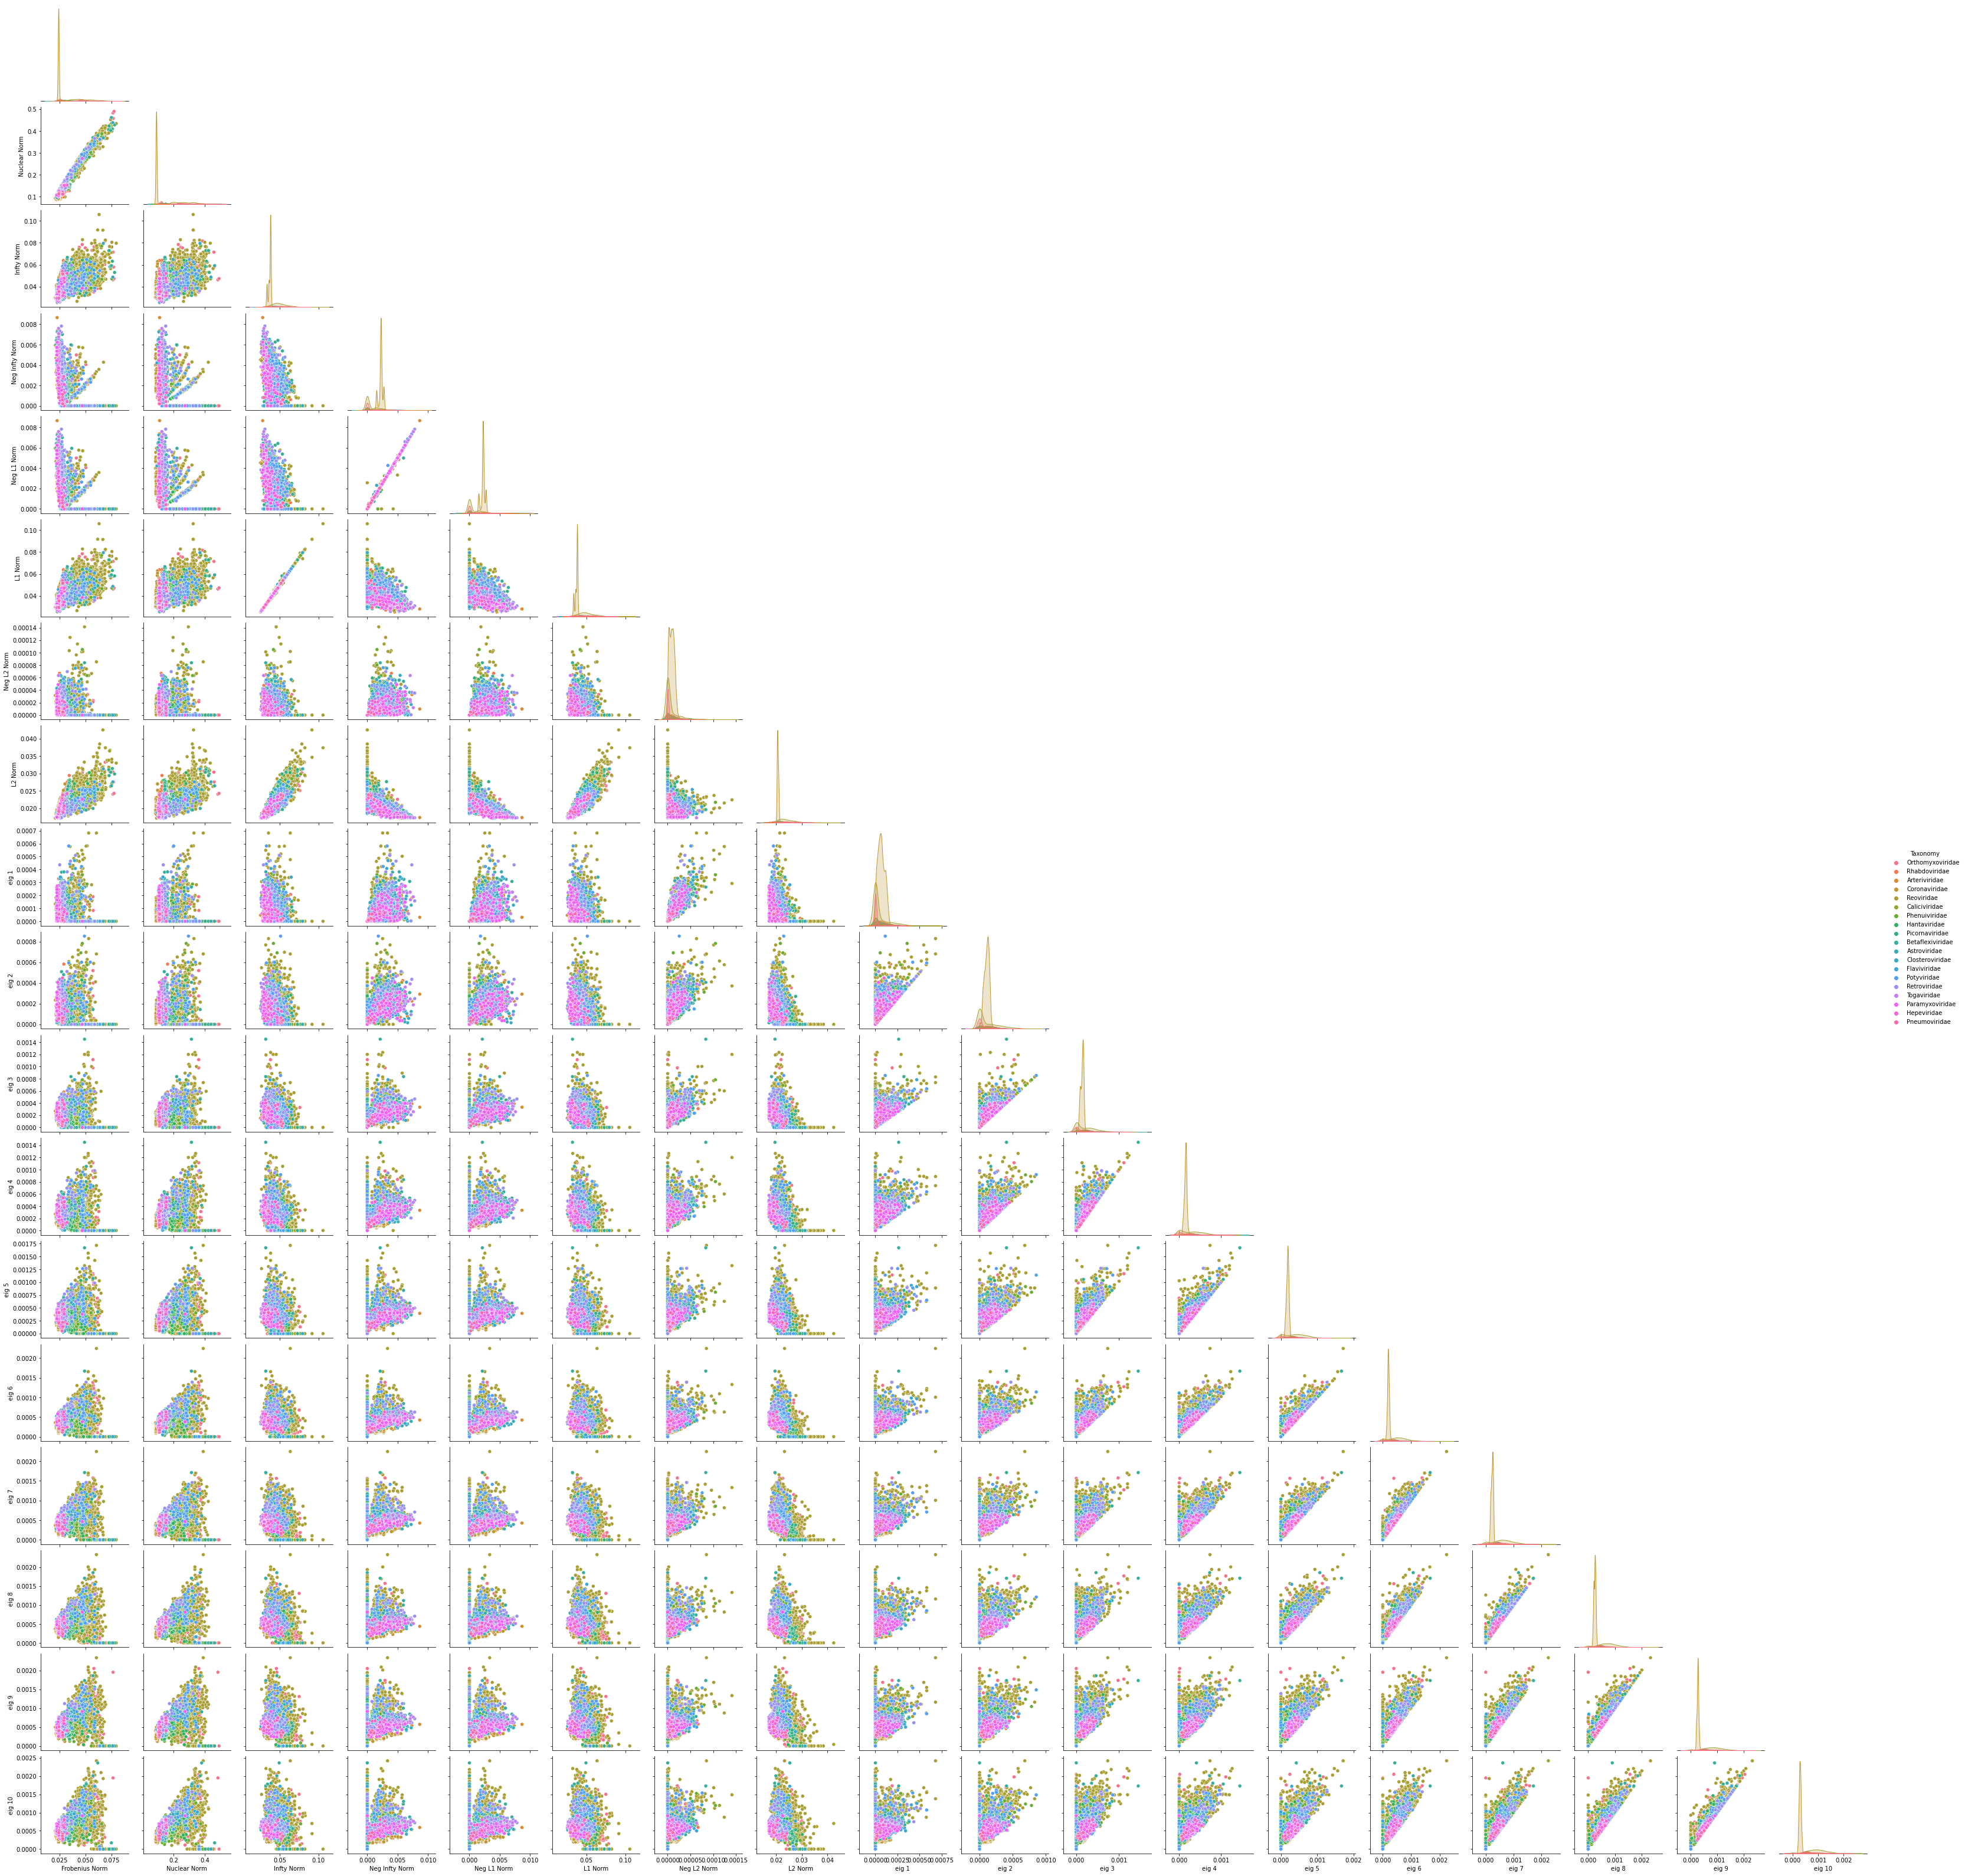

In [ ]:
sns.pairplot(data=df, hue='Taxonomy', corner=True)
plt.show()

# Random Forest Model

## Training

In [ ]:
X = df.drop(['Taxonomy', 'Unnamed: 0'], axis=1)
y = df['Taxonomy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    max_depth=20
)

In [ ]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt')

## Testing

In [ ]:
print(forest.score(X_train_std, y_train))
print(forest.score(X_test_std, y_test))

1.0
0.812


# Results



## Cross Validation

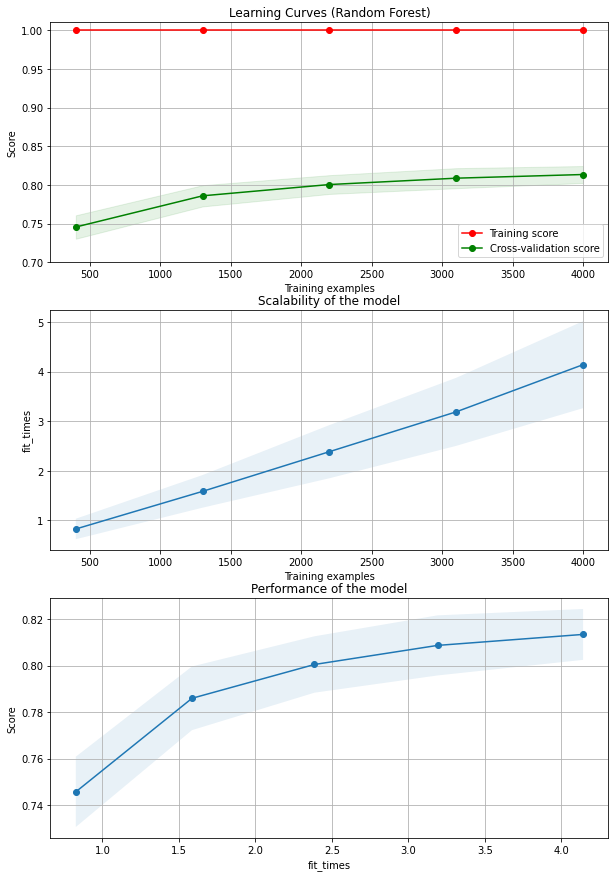

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = forest
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes,
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

plt.show()

In [ ]:
fig.savefig('/content/drive/MyDrive/Grupo-ai-Medicos/Results/learning_curves.png', dpi=100)

In [ ]:
# Graficar Region de decisión
X_combined = np.vstack((X_train_std[['Frobenius Norm', 'eig 1']], X_test_std[['Frobenius Norm', 'eig 1']]))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier = forest,
                      test_idx = range(105, 150))

plt.xlabel('Frobenius Norm')
plt.ylabel('First eigenvalue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Confusion Matrix

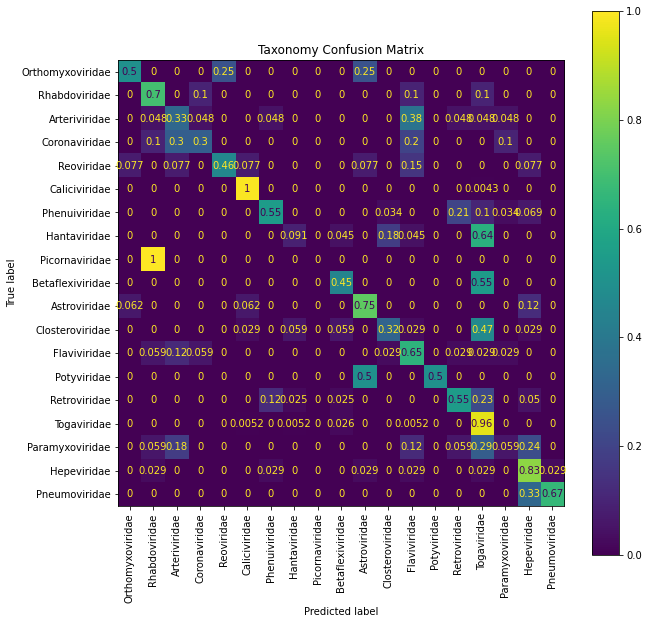

In [ ]:
y_pred = forest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plot_cmat(cm, taxonomies)

# Model export

In [ ]:
joblib.dump(forest, '/content/drive/MyDrive/Grupo-ai-Medicos/Results/random_forest_model.pkl')

['/content/drive/MyDrive/Grupo-ai-Medicos/Results/random_forest_model.pkl']

# Model import

In [4]:
forest = joblib.load('/content/drive/MyDrive/Grupo-ai-Medicos/Results/random_forest_model.pkl')